In [1]:
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.fft import fft, fftfreq

In [2]:
data, fsamp = sf.read('./signalV 1.wav')

In [3]:
fsamp

192000

**Paso 1**. Encuentren la representación en el tiempo y en la frecuencia de la señal
entregada. Esto les permitirá saber que frecuencias pueden utilizar en la
demodulación.

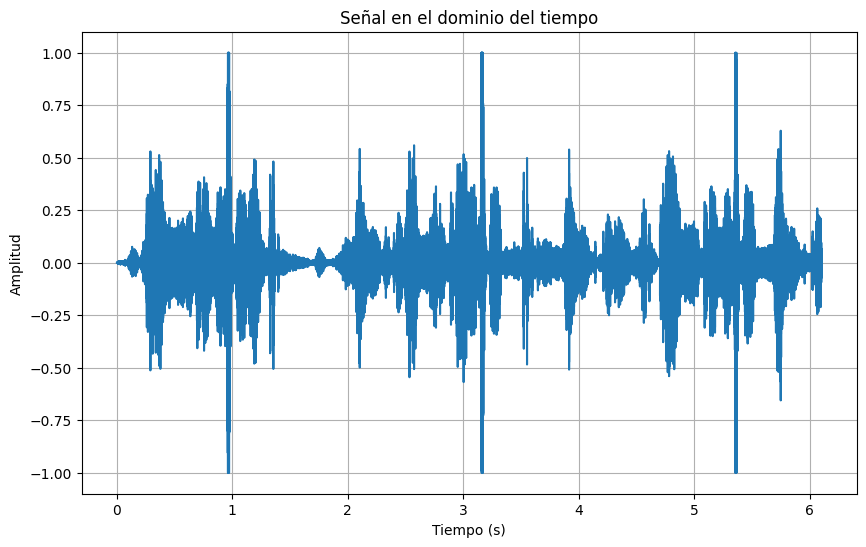

In [26]:
time = np.arange(0, len(data))/fsamp
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

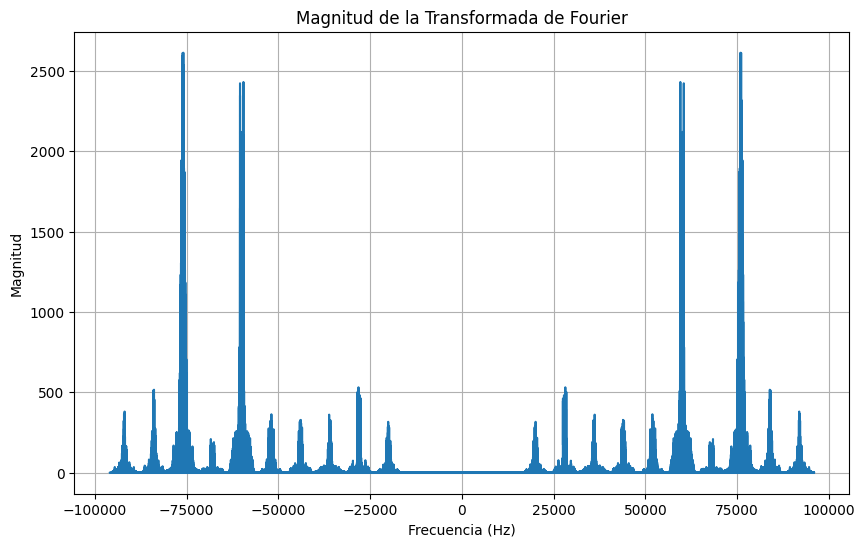

In [29]:
fft_data = fft(data)
freqs = fftfreq(len(data), 1/fsamp)

plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_data))
plt.title('Magnitud de la Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Filtro pasabandas

In [32]:
fcorte = [70000, 80000]  
fcorte_rad1 = [2 * np.pi * 70000, 2 * np.pi * 80000]
orden_filtro = 10

In [33]:
# Diseñar el filtro pasa banda
sos = signal.butter(orden_filtro, fcorte, fs=fsamp, btype='bandpass', output='sos')


In [34]:
# Filtrar la señal
data_filtrada = signal.sosfilt(sos, data)

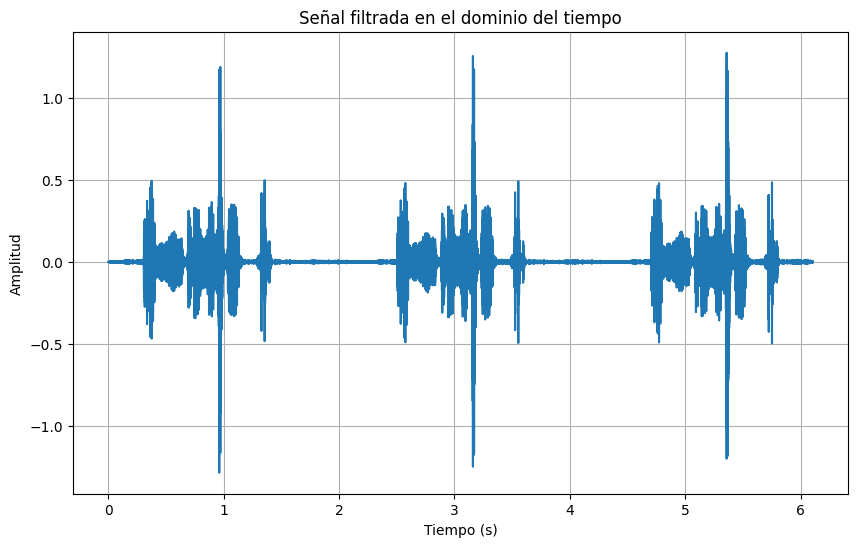

In [35]:
# Graficar la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(time, data_filtrada)
plt.title('Señal filtrada en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

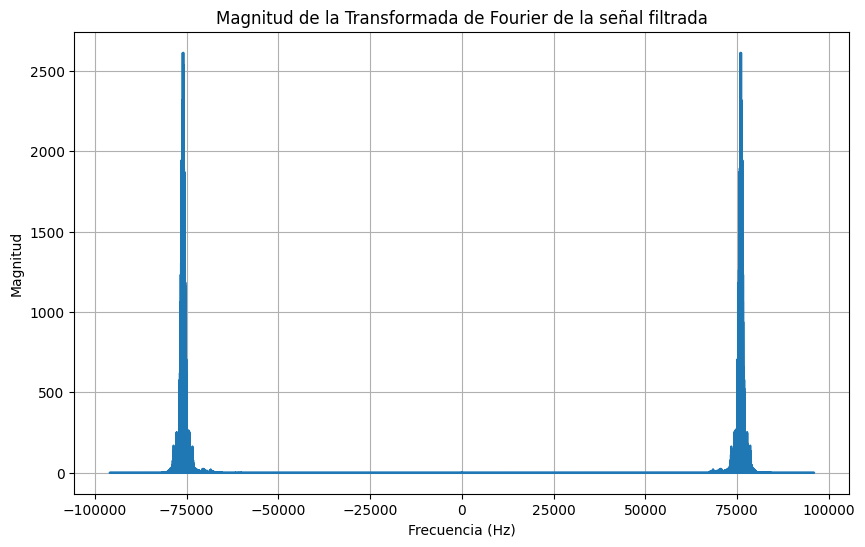

In [36]:
# Calcular la transformada de Fourier de la señal filtrada
fft_data_filtrada = fft(data_filtrada)

# Graficar la magnitud de la transformada de Fourier de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_data_filtrada))
plt.title('Magnitud de la Transformada de Fourier de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

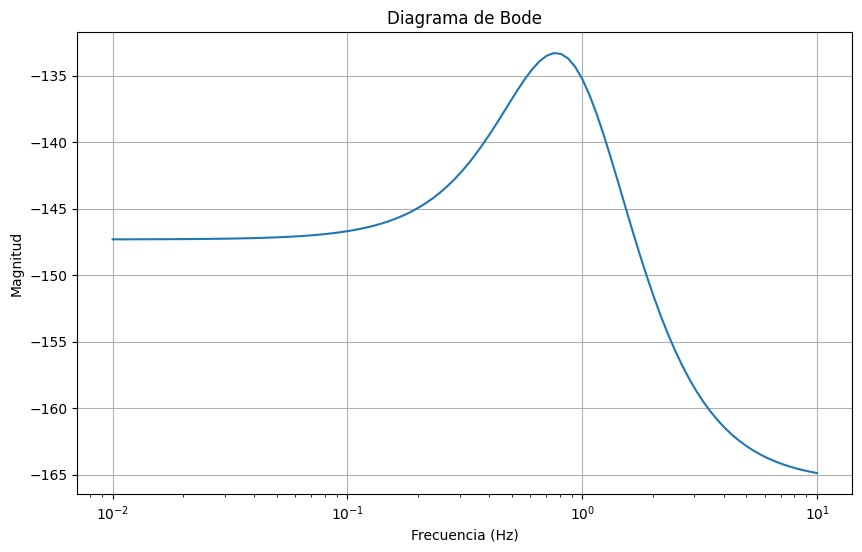

In [39]:
# Diagrama de bode
b,a = signal.butter(orden_filtro, fcorte, fs=fsamp, btype='bandpass')
sys = signal.TransferFunction(b, a)
w, mag, phase = signal.bode(sys)

plt.figure(figsize=(10, 6))
plt.semilogx(w, mag)
plt.title('Diagrama de Bode')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [41]:
# Mezclar la senal original con una sinusoidal con una frecuencia igual a la frecuencia central del filtro pasa banda
frecuencia_central = (fcorte[0] + fcorte[1]) / 2

tiempo = np.arange(len(data)) / fsamp
senal_modulada_amplitud = data_filtrada * np.exp(1j * 2 * np.pi * frecuencia_central * tiempo)
sinusoidal = np.exp(-1j * 2 * np.pi * frecuencia_central * tiempo)

# Multiplicar la señal de interés por la sinusoidal
senal_modulada = senal_modulada_amplitud * data_filtrada


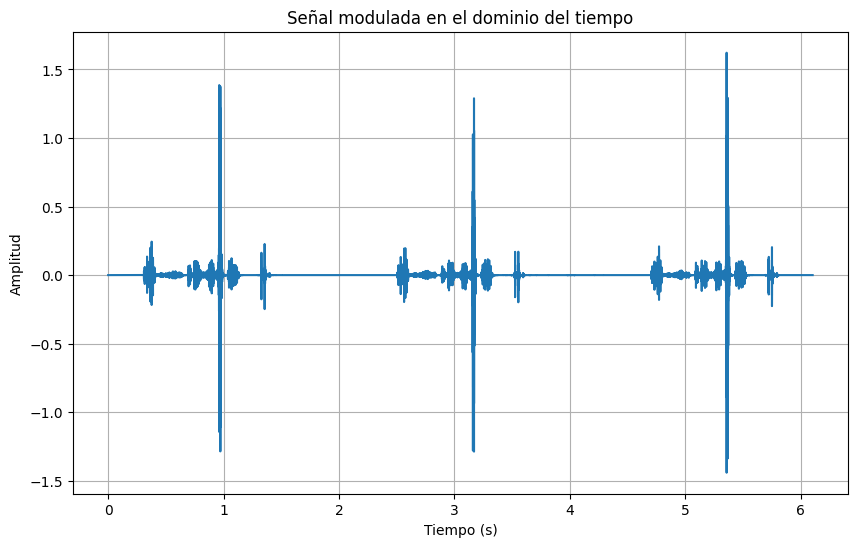

In [43]:
# Graficar senal modulada en el tiempy la frecuencia
plt.figure(figsize=(10, 6))
plt.plot(time, senal_modulada.real)
plt.title('Señal modulada en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


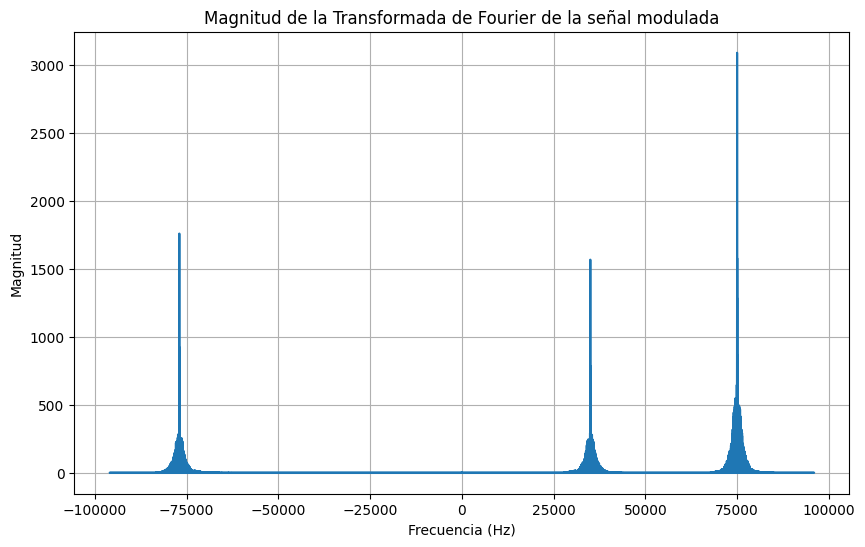

In [45]:
# Calcular la transformada de Fourier de la señal modulada
fft_senal_modulada = fft(senal_modulada)

# Graficar la magnitud de la transformada de Fourier de la señal modulada
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_senal_modulada))
plt.title('Magnitud de la Transformada de Fourier de la señal modulada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [47]:
# Reproducir la señal modulada
sd.play(data_filtrada, fsamp)